In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load parsed annotations created in Notebook 01
df = pd.read_csv("../eda_outputs/tables/parsed_annotations.csv")

df.head()

,image,split,category,x1,y1,x2,y2,width,height,aspect_ratio,occluded,truncated,weather,scene,timeofday
0,0000f77c-6257be58.jpg,train,traffic light,1125.902264,133.184488,1156.978645,210.875445,31.076381,77.690957,0.400000,False,False,clear,city street,daytime
1,0000f77c-6257be58.jpg,train,traffic light,1156.978645,136.637417,1191.507960,210.875443,34.529315,74.238026,0.465116,False,False,clear,city street,daytime
2,0000f77c-6257be58.jpg,train,traffic sign,1101.731743,211.122087,1170.790370,233.566141,69.058627,22.444054,3.076923,False,False,clear,city street,daytime
3,0000f77c-6257be58.jpg,train,traffic sign,0.000000,0.246631,100.381647,122.825696,100.381647,122.579065,0.818913,False,True,clear,city street,daytime
4,0000f77c-6257be58.jpg,train,car,45.240919,254.530367,357.805838,487.906215,312.564919,233.375848,1.339320,False,False,clear,city street,daytime


In [2]:
print("Total rows:", len(df))
print("Unique images:", df['image'].nunique())
df.info()

Total rows: 1472397
Unique images: 79863
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472397 entries, 0 to 1472396
Data columns (total 15 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   image         1472397 non-null  object 
 1   split         1472397 non-null  object 
 2   category      1472397 non-null  object 
 3   x1            1472397 non-null  float64
 4   y1            1472397 non-null  float64
 5   x2            1472397 non-null  float64
 6   y2            1472397 non-null  float64
 7   width         1472397 non-null  float64
 8   height        1472397 non-null  float64
 9   aspect_ratio  1472397 non-null  float64
 10  occluded      1472397 non-null  bool   
 11  truncated     1472397 non-null  bool   
 12  weather       1472397 non-null  object 
 13  scene         1472397 non-null  object 
 14  timeofday     1472397 non-null  object 
dtypes: bool(2), float64(7), object(6)
memory usage: 148.8+ MB


In [3]:
class_counts = df["category"].value_counts().sort_values(ascending=False)
class_counts

category
car              815717
traffic sign     274594
traffic light    213002
person           104611
truck             34216
bus               13269
bike               8217
rider              5166
motor              3454
train               151
Name: count, dtype: int64

C:\Users\niran\AppData\Local\Temp\ipykernel_23236\582664070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


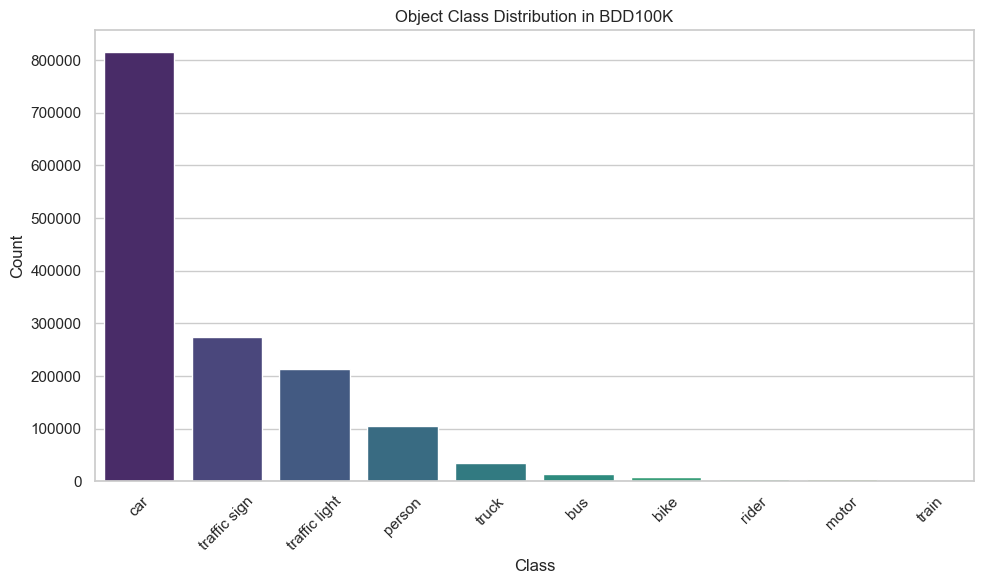

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

plt.title("Object Class Distribution in BDD100K")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
class_pct = (class_counts / class_counts.sum() * 100).round(2).reset_index()
class_pct.columns = ["category", "percent"]
class_pct

,category,percent
0,car,55.40
1,traffic sign,18.65
2,traffic light,14.47
3,person,7.10
4,truck,2.32
5,bus,0.90
6,bike,0.56
7,rider,0.35
8,motor,0.23
9,train,0.01


In [6]:
class_pct.to_csv("../eda_outputs/tables/class_distribution_percent.csv", index=False)

In [7]:
timeofday_counts = df["timeofday"].value_counts()
timeofday_counts

timeofday
daytime      836023
night        523285
dawn/dusk    111769
undefined      1320
Name: count, dtype: int64

C:\Users\niran\AppData\Local\Temp\ipykernel_23236\2306914328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=timeofday_counts.index, y=timeofday_counts.values, palette="magma")


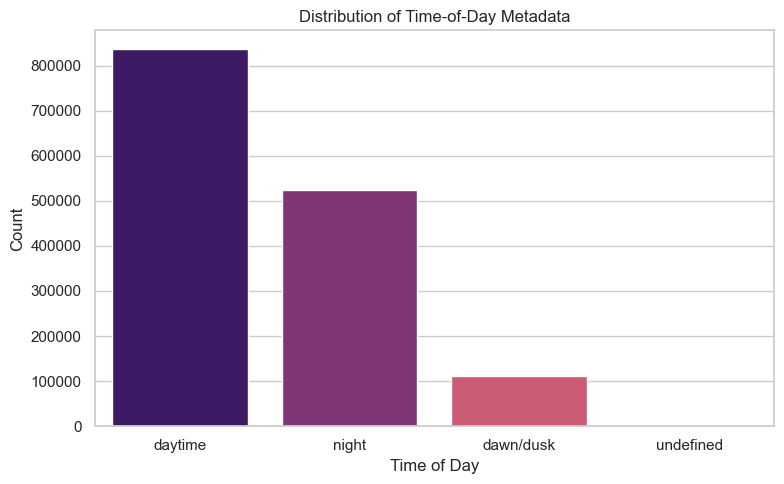

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=timeofday_counts.index, y=timeofday_counts.values, palette="magma")
plt.title("Distribution of Time-of-Day Metadata")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [9]:
weather_counts = df["weather"].value_counts()
weather_counts

weather
clear            747466
overcast         210548
undefined        184230
snowy            113728
partly cloudy    111815
rainy            102526
foggy              2084
Name: count, dtype: int64

C:\Users\niran\AppData\Local\Temp\ipykernel_23236\726204927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="coolwarm")


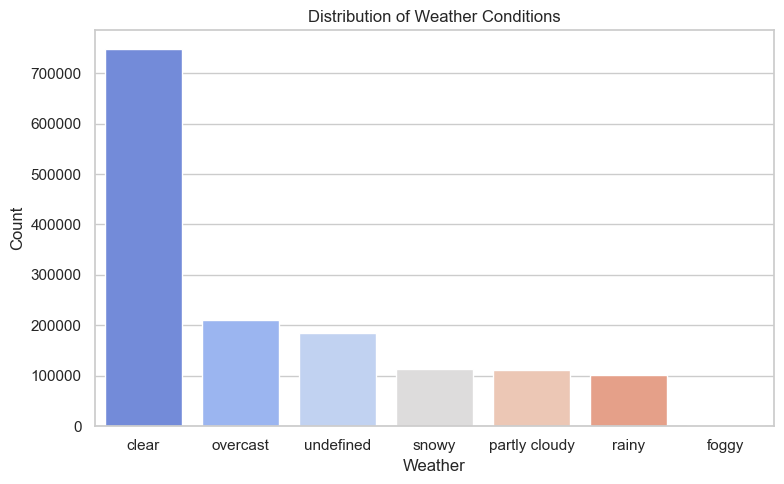

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="coolwarm")
plt.title("Distribution of Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
scene_counts = df["scene"].value_counts()
scene_counts

scene
city street     1016575
highway          290155
residential      153884
parking lot        6397
undefined          3967
tunnel             1050
gas stations        369
Name: count, dtype: int64

C:\Users\niran\AppData\Local\Temp\ipykernel_23236\4186793739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scene_counts.index, y=scene_counts.values, palette="cubehelix")


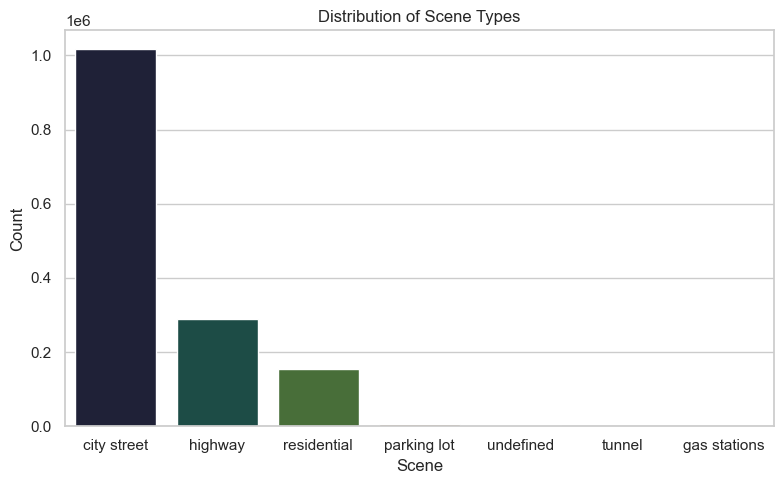

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=scene_counts.index, y=scene_counts.values, palette="cubehelix")
plt.title("Distribution of Scene Types")
plt.xlabel("Scene")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
metadata_summary = pd.DataFrame({
    "timeofday": timeofday_counts,
    "weather": weather_counts,
    "scene": scene_counts
})

metadata_summary

,timeofday,weather,scene
city street,NaN,NaN,1016575.0
clear,NaN,747466.0,NaN
dawn/dusk,111769.0,NaN,NaN
daytime,836023.0,NaN,NaN
foggy,NaN,2084.0,NaN
gas stations,NaN,NaN,369.0
highway,NaN,NaN,290155.0
night,523285.0,NaN,NaN
overcast,NaN,210548.0,NaN
parking lot,NaN,NaN,6397.0


In [14]:
print("===== SUMMARY =====")
print("Total object annotations:", len(df))
print("Classes:", class_counts.to_dict())
print("\nTime of day distribution:", timeofday_counts.to_dict())
print("\nWeather distribution:", weather_counts.to_dict())
print("\nScene distribution:", scene_counts.to_dict())

===== SUMMARY =====
Total object annotations: 1472397
Classes: {'car': 815717, 'traffic sign': 274594, 'traffic light': 213002, 'person': 104611, 'truck': 34216, 'bus': 13269, 'bike': 8217, 'rider': 5166, 'motor': 3454, 'train': 151}

Time of day distribution: {'daytime': 836023, 'night': 523285, 'dawn/dusk': 111769, 'undefined': 1320}

Weather distribution: {'clear': 747466, 'overcast': 210548, 'undefined': 184230, 'snowy': 113728, 'partly cloudy': 111815, 'rainy': 102526, 'foggy': 2084}

Scene distribution: {'city street': 1016575, 'highway': 290155, 'residential': 153884, 'parking lot': 6397, 'undefined': 3967, 'tunnel': 1050, 'gas stations': 369}
